In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import keras
from keras import layers


In [2]:
# upload data
df = pd.read_csv("numeric_dataset.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,57,0,2,1,3,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,80,0,0,1,3,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,67,0,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,77,0,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,42,0,0,1,3,8,0,0,0


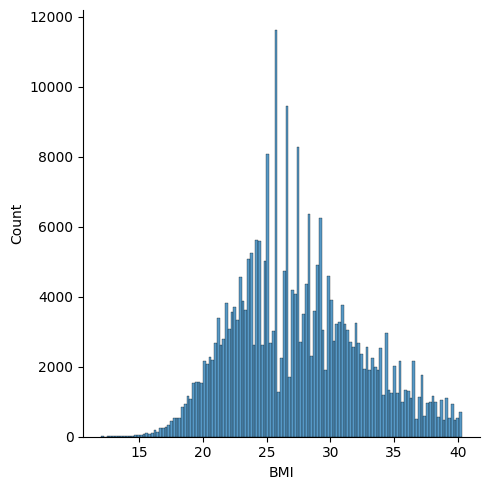

In [3]:
# let's go through Ydata and DataPrep reports
# and balance every variable

# the first one is BMI
# unfortunaly, I cannot add screenshots here
# because it could be very convenient to demonstrate plots
# but I will show here plots after balancing data

df = df.query("BMI < BMI.quantile(0.95)")
sns.displot(df, x="BMI")

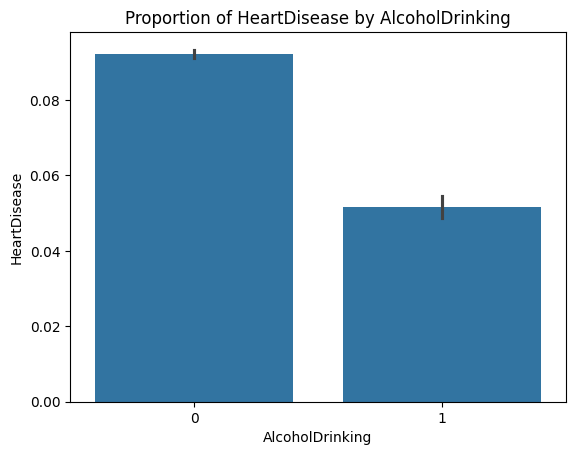

In [4]:
# for smokking column we have a difference in 40k
# I will keep this column as it is 
# because even though there is a bit difference
# it is not very critical from my pint of view

# the next one is AlcoholDrinking
# well here the situation is more challenging
# NO - 298 018 
# YES - 21 777
# the difference almost in 10 times

# I decided to check the impact of these variables on the target one (Heart disease)
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate proportions of HeartDisease for each AlcoholDrinking category
sns.barplot(x='AlcoholDrinking', y='HeartDisease', data=df)
plt.title('Proportion of HeartDisease by AlcoholDrinking')
plt.show()

# of course, it says that if a person drinks alcohol
# there is more likelyhood that they have a hear disease
# but we should keep in mind  that not only alcohol affect the target variable

In [5]:
# Group by AlcoholDrinking and calculate the mean of the target variable
group_means = df.groupby('AlcoholDrinking')['HeartDisease'].mean()
print(group_means)

# This means that 9.22% of people who do not drink alcohol have heart disease.
# This means that 5.17% of people who do drink alcohol have heart disease.

# I decided to not belance date because it is binary variable 
# and it goes without saying that alcohol and tobacco has
# a crucial impact on health

# I will miss balancing for the next values because they are binary
# Stroke	DiffWalking	Sex	Diabetic	PhysicalActivity	Asthma	KidneyDisease	SkinCancer

# but these ones are not binary
# that is why I will take a look at them
# PhysicalHealth
# MentalHealth
# Race 
# SleepTime

# AgeCategory looks pretty decent
# GenHealth	looks very natural
# these two categories do not require changes

AlcoholDrinking
0    0.092201
1    0.051693
Name: HeartDisease, dtype: float64


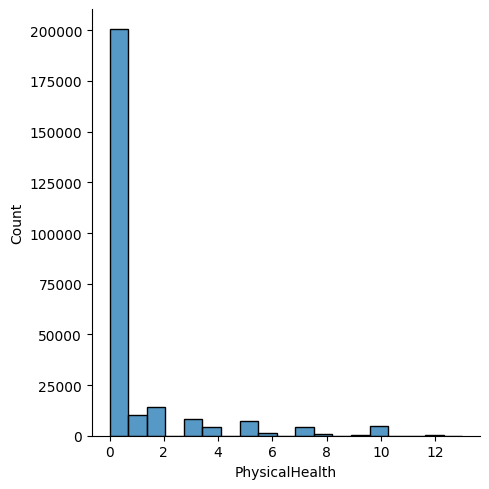

In [6]:
# remind that all graphs with imbalanced data
# are in Ydata and DataPrep reports

# balancing data
df = df.query("PhysicalHealth < PhysicalHealth.quantile(0.90)")
sns.displot(df, x="PhysicalHealth")

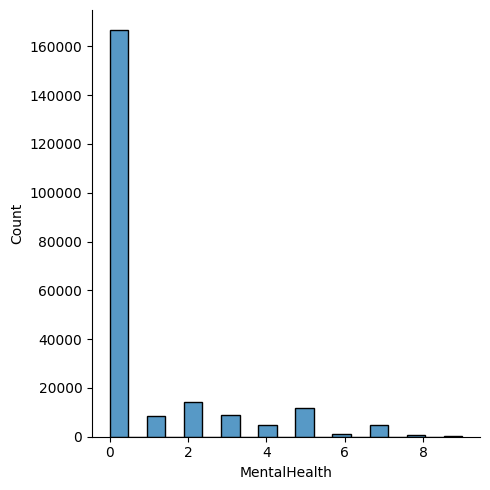

In [7]:
# balancing data
df = df.query("MentalHealth < MentalHealth.quantile(0.90)")
sns.displot(df, x="MentalHealth")

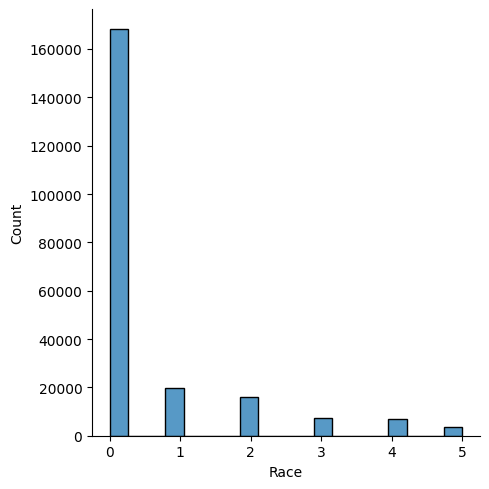

In [ ]:
# now we have a plot with qty for every race
sns.displot(df, x="Race")

# let's check exact numbers

In [9]:
# count the quantity of values in the 'Race' column
race_counts = df['Race'].value_counts()

# print the counts
print(race_counts)

# Categories with smaller counts (like 2,989 or 6,107) are not necessarily outliers,
# but they may lead to difficulties in making inferences 
# about these groups due to the small sample sizes

# these categories represent racial minorities or small subpopulations, 
# it might be important to keep them, as excluding these groups could 
# introduce bias. 
# 
# In many real-world datasets, small groups exist naturally 
# and should not be considered "outliers" in the statistical sense, 
# but rather as part of diversity

0    168141
1     19944
2     16146
3      7483
4      6846
5      3498
Name: Race, dtype: int64


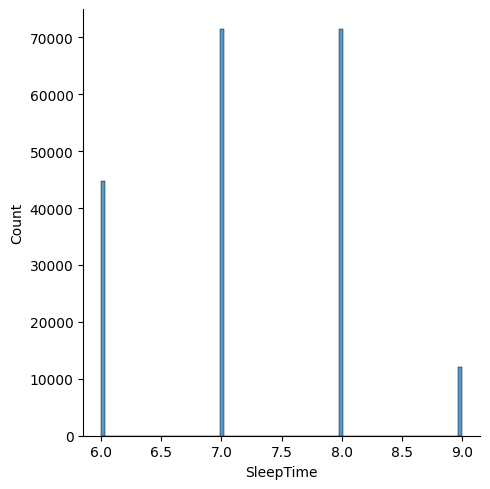

In [10]:
# balancing data
df = df.query("SleepTime > SleepTime.quantile(0.05) and SleepTime < SleepTime.quantile(0.97)")
sns.displot(df, x="SleepTime")

# I experimented a bit with %
# and found the best pair for balacing this column

In [11]:
# saving numeric dataset for creating a neural network
# Save the modified dataset as a CSV file
df.to_csv('balanced_dataset.csv', index=False)
